In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
from keras.preprocessing import image

ModuleNotFoundError: No module named 'keras'

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
_URL = 'https://he-public-data.s3-ap-southeast-1.amazonaws.com/HE_Challenge_data.zip'
zip_dir = tf.keras.utils.get_file('HE_Challenge_data.zip', origin=_URL, extract=True)

948969472/948965311 [==============================] - 91s 0us/step


In [4]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/data
/root/.keras/datasets/data/test
/root/.keras/datasets/data/train


In [0]:
base_dir = os.path.join(os.path.dirname(zip_dir),'data')

In [0]:
train=os.path.join(base_dir, 'train.csv')

In [0]:
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [0]:
num_train=len(os.listdir(train_dir))

In [0]:
num_test=len(os.listdir(test_dir))

In [10]:
print(num_train,num_test)

18541 2010


In [0]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150  # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [0]:
train=pd.read_csv(train)

In [13]:
train.head()

,image_id,category
0,0,77
1,1,81
2,2,52
3,3,72
4,4,58


In [14]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img(train_dir+'/'+train['image_id'][i].astype('str')+'.jpg', target_size=(150,150,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)

100%|██████████| 18540/18540 [01:09<00:00, 268.58it/s]


In [0]:
X=np.array(train_image)

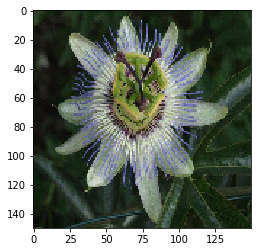

In [16]:
plt.imshow(X[0])
plt.show()

In [0]:
#X=tf.keras.utils.normalize(X,axis=1)

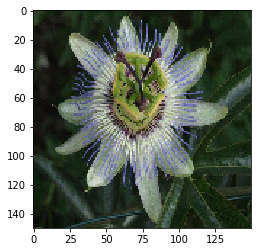

In [18]:
plt.imshow(X[0])
plt.show()

In [0]:
y=train['category'].values.astype('int32')

In [20]:
y

array([77, 81, 52, ..., 78, 74, 29], dtype=int32)

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(103, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [23]:
model.fit(X, y, epochs=10)

Epoch 1/10
18540/18540 [==============================] - 19s 1ms/sample - loss: 3.1970 - acc: 0.2106
Epoch 2/10
18540/18540 [==============================] - 15s 834us/sample - loss: 1.7829 - acc: 0.5079
Epoch 3/10
18540/18540 [==============================] - 15s 834us/sample - loss: 1.0152 - acc: 0.7031
Epoch 4/10
18540/18540 [==============================] - 16s 840us/sample - loss: 0.5665 - acc: 0.8267
Epoch 5/10
18540/18540 [==============================] - 16s 842us/sample - loss: 0.3272 - acc: 0.8990
Epoch 6/10
18540/18540 [==============================] - 16s 847us/sample - loss: 0.2087 - acc: 0.9317
Epoch 7/10
18540/18540 [==============================] - 16s 844us/sample - loss: 0.1524 - acc: 0.9536
Epoch 8/10
18540/18540 [==============================] - 16s 842us/sample - loss: 0.1407 - acc: 0.9547
Epoch 9/10
18540/18540 [==============================] - 16s 841us/sample - loss: 0.1290 - acc: 0.9608
Epoch 10/10
18540/18540 [==============================] - 16s 841

In [0]:
test=os.path.join(base_dir, 'test.csv')

In [0]:
test=pd.read_csv(test)

In [28]:
test.head()

,image_id,category
0,18540,NaN
1,18541,NaN
2,18542,NaN
3,18543,NaN
4,18544,NaN


In [29]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img(test_dir+'/'+test['image_id'][i].astype('str')+'.jpg', target_size=(150,150,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
X1=np.array(test_image)

100%|██████████| 2009/2009 [00:07<00:00, 270.49it/s]


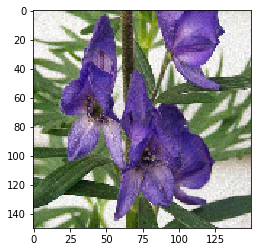

In [30]:
plt.imshow(X1[0])
plt.show()

In [0]:
predictions1=model.predict(X1)

In [32]:
print(np.argmax(predictions1[2008]))

94


In [0]:
results = np.argmax(predictions1,axis = 1)

results = pd.Series(results,name="category")

submission = pd.concat([pd.Series(range(18540,20549),name = "image_id"),results],axis = 1)

submission.to_csv("submission_final.csv",index=False)

In [34]:
submission.head()

,image_id,category
0,18540,68
1,18541,51
2,18542,39
3,18543,19
4,18544,55


In [35]:
submission.tail()

,image_id,category
2004,20544,58
2005,20545,95
2006,20546,77
2007,20547,72
2008,20548,94
